In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
states_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
all_us_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
counties_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'

# 1. States 

In [3]:
states_df = pd.read_csv(states_url)
states_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
states_df = states_df.sort_values(['state', 'date'])
states_df.head()

,date,state,fips,cases,deaths
586,2020-03-13,Alabama,1,6,0
637,2020-03-14,Alabama,1,12,0
689,2020-03-15,Alabama,1,23,0
742,2020-03-16,Alabama,1,29,0
795,2020-03-17,Alabama,1,39,0


In [5]:
# states_df.groupby('state')['cases'].plot(legend=True);

In [6]:
states_df['new_cases'] = states_df.groupby('state')['cases'].diff()

In [7]:
# states_df.groupby('state')['new_cases'].plot(legend=True);

In [8]:
subset_df = states_df[states_df['state'].isin(
    ['New York', 'New Jersey', 'Florida']
)]

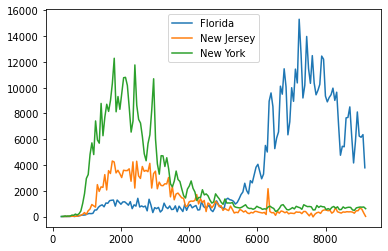

In [9]:
subset_df.groupby('state')['new_cases'].plot(legend=True);

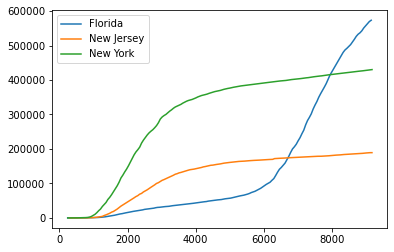

In [10]:
subset_df.groupby('state')['cases'].plot(legend=True);

In [11]:
states_df[states_df ['date']==states_df['date'].max()].sort_values('new_cases', ascending=False).head(5)[['state','new_cases']]

,state,new_cases
9190,Texas,8121.0
9148,California,6527.0
9153,Florida,3779.0
9189,Tennessee,1849.0
9154,Georgia,1821.0


# 2. Counties 

In [12]:
counties_df = pd.read_csv(counties_url)
counties_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [13]:
counties_df[(counties_df.county=='Somerset') & (counties_df.state=='New Jersey')]

,date,county,state,fips,cases,deaths
3015,2020-03-16,Somerset,New Jersey,34035.0,4,0
3528,2020-03-17,Somerset,New Jersey,34035.0,6,0
4124,2020-03-18,Somerset,New Jersey,34035.0,15,0
4851,2020-03-19,Somerset,New Jersey,34035.0,20,0
5695,2020-03-20,Somerset,New Jersey,34035.0,27,0
...,...,...,...,...,...,...
426409,2020-08-12,Somerset,New Jersey,34035.0,5350,564
429633,2020-08-13,Somerset,New Jersey,34035.0,5357,564
432860,2020-08-14,Somerset,New Jersey,34035.0,5366,564
436086,2020-08-15,Somerset,New Jersey,34035.0,5375,565


# 3. NYC Data

In [14]:
nyc_boro_url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/boro/boroughs-case-hosp-death.csv'
nyc_tests_url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/tests.csv'
nyc_boro_df = pd.read_csv(nyc_boro_url)
nyc_tests_df = pd.read_csv(nyc_tests_url)

In [15]:
nyc_boro_df.head()

,DATE_OF_INTEREST,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT
0,02/29/2020,0,4,0,0,3,0,1,2,0,0,2,0,0,0,0
1,03/01/2020,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0
2,03/02/2020,0,4,0,0,9,0,0,4,0,0,4,0,0,0,0
3,03/03/2020,0,5,0,1,7,0,0,2,0,1,5,0,0,1,0
4,03/04/2020,1,5,0,0,6,0,2,6,0,2,3,0,0,2,0


In [16]:
def clean_nyc_data_by_metric(metric):
    column_filter = nyc_boro_df.columns.to_series().str.contains(metric)
    column_filter.DATE_OF_INTEREST = True
    columns = nyc_boro_df.columns[column_filter]
    nyc_cases = nyc_boro_df[columns]
    nyc_cases.columns = ['date', 'Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island']

    return nyc_cases

In [17]:
nyc_cases_df = clean_nyc_data_by_metric('CASE_COUNT')
nyc_hospitalized_df = clean_nyc_data_by_metric('HOSPITALIZED_COUNT')
nyc_deaths_df = clean_nyc_data_by_metric('DEATH_COUNT')

In [18]:
nyc_cases_tidy_df = pd.melt(nyc_cases_df, 
        ["date"],
        var_name="boro",
        value_name="new_cases")

In [19]:
nyc_cases_tidy_df.boro.unique()

array(['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [20]:
nyc_tests_df.head()

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,PERCENT_POSITIVE_3DAYS_AGG
0,03/03/2020,13,1,0.0769,NaN
1,03/04/2020,32,5,0.1563,NaN
2,03/05/2020,65,4,0.0615,0.09
3,03/06/2020,85,8,0.0941,0.09
4,03/07/2020,67,8,0.1194,0.09


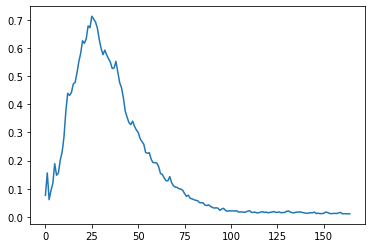

In [21]:
nyc_tests_df.PERCENT_POSITIVE.plot()

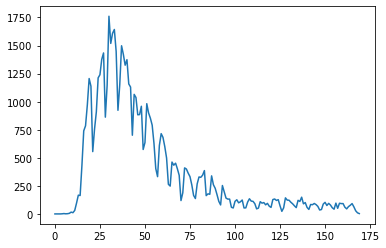

In [22]:
nyc_boro_df.BK_CASE_COUNT.plot()

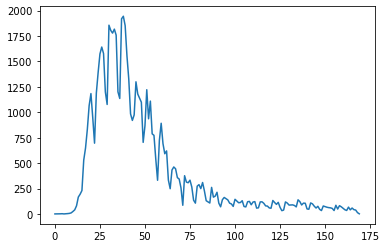

In [23]:
nyc_boro_df.QN_CASE_COUNT.plot()